<a href="https://colab.research.google.com/github/htapiagroup/sistemas-distribuidos-evaluacion-intersemestral-ark150/blob/master/MAC_SistDist_Ex1_LDHJ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Nombre: Luis Daniel Hernandez Jimenez

Se realizo en conjunto con:

David Cobos

Samuel Baez Herrera

Alexis Martinez Arteaga

Lorrain Eugenio Giddings Soto

Yoselin Aracely Campos Sacramento

Ana Margarita Reyes Hernandez

Aguilar Hernandez Joaquin

Georgina Valenzuela Carrasco

Adrian Sosa Medellin

Horacio Tapia McClung

#Punto 1
Adquirir los datos.

El conjunto de datos con el que van a trabajar esta disponibles en este enlace y consiste en 12 archivos de texto que tiene informacion del viajes de taxis en la ciudad de NY durante el 2013.

En la red interna de LANIA usando cable la descarga del archivo comprimido desde el enlace tomó entre 5 y 10 minutos. Tomen sus provisiones

El archivo comprimido tiene un tamaño de aproximadamente 4G, el tamaño de archivo mensual oscila entre 2.0 y 2.5G. La base de datos completa es de aproximadamente 30G.

Una vez descargado el archivo pueden descomprimirlo usando la siguiente instruccion
!7z x trip_data.7z -o/content/ sin embargo si intentan descomprimir todos los archivos en su sesion se van a terminar el espacio de disco disponible. 

En esta practica solo van a trabajar con datos correspondientes a los primeros cuatro meses.

In [1]:
# Ejecuta esta celda para activar Google Drive.
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
cd drive/My\ Drive/Colab\ Notebooks/data

/content/drive/My Drive/Colab Notebooks/data


#Punto 2
Una vez descargado el archivo pueden descomprimirlo usando la siguiente instruccion


!7z x trip_data.7z -o/content/ sin embargo si intentan descomprimir todos los archivos en su sesion se van a terminar el espacio de disco disponible. En esta practica solo van a trabajar con datos correspondientes a los primeros cuatro meses.

In [0]:
!wget https://archive.org/download/nycTaxiTripData2013/trip_data.7z

In [0]:
!7z e trip_data.7z -o/content/drive/My\ Drive/'Colab Notebooks'/data trip_data_1.csv

In [0]:
!7z x trip_data.7z 

#Punto 3,4,5 

Responder las siguientes preguntas:
Cuantas columnas contiene cada archivo de datos descomprimido
Cuantos renglones tiene cada archivo


Identificar si existen renglones con errores en los datos, por ejemplo si hay columnas de mas (o de menos), si hay campos vacios, etc. Si se detectan renglones con errores:
indicar claramente cuantos son los renglones con errores y a que archivos corresponden
crear un nuevo conjunto de datos con los errores eliminados


Crear un DataFrame usando la libreria pandas y responder lo siguiente:
Indicar el tiempo en segundos, que tarda la libreria pandas en leer un archivo a un DataFrame
Cual es la huella de memoria del proceso usado para generar el objeto DataFrame
Cuanta memoria del sistema se usa para crear el objeto anterior
Indicar el tiempo que tarda pandas en obtener el promedio de la distancia de viaje (trip_distance)

In [0]:
import pandas as pd, time, gc

In [0]:
import psutil, os

In [0]:
gc.enable()

In [0]:
#from time import time

In [0]:
def huella_de_memoria():
  '''regresa la memoria usada por un proceso en python'''
  mem= psutil.Process(os.getpid()).memory_info().rss
  return (mem / 1024**2)

In [0]:
archivos = 'trip_data_{:d}.csv'
plantilla = [archivos.format(i) for i in range(1, 13)]

In [0]:
#aportacion adrian
class datos():
  def __init__(self):
    self.name = ""
    self.rows = 0
    self.cols = 0
    self.tiempo = 0
    self.huellam = 0 
    self.memoria= 0
    self.empyreg = 0
    self.tiempoprom = 0

In [0]:
listaDatos=[]

In [0]:
#aportacion de adrian
for archivo in plantilla:
  nom = "nuevo_" + archivo
  if not os.path.exists(nom):
    dato=datos()
    t_start = time.time()
    antesH = huella_de_memoria()
    try:
      df = pd.read_csv(archivo, usecols=["medallion",  "pickup_datetime", "dropoff_datetime", "passenger_count", "trip_time_in_secs", "trip_distance", "pickup_longitude", "pickup_latitude", "dropoff_longitude", "dropoff_latitude"])
    except :
      pass
    try:
      df = pd.read_csv(archivo, usecols=["medallion",  " pickup_datetime", " dropoff_datetime", " passenger_count", " trip_time_in_secs", " trip_distance", " pickup_longitude", " pickup_latitude", " dropoff_longitude", " dropoff_latitude"])
    except :
      pass
    t_end = time.time()
    despuesH = huella_de_memoria()
    dato.name=archivo
    forma=df.shape
    dato.rows=forma[0]
    dato.cols=forma[1]
    dato.huellam=(despuesH-antesH)
    dato.tiempo=(t_end-t_start)*1000
    dato.memoria=df.memory_usage().sum()
    df = df.rename(columns=lambda x: x.strip())
    dato.empyreg = df.isna().sum()
    df.dropna()
    df = df.drop(df[df.passenger_count > 9].index)
    forma=df.shape
    c=forma[1]
    if c>11:
      del df['Unnamed: 0']
    t_start = time.time()
    df['trip_distance'].mean()
    t_end = time.time()
    dato.tiempoprom=(t_end-t_start)*1000
    df.to_csv(nom)
    listaDatos.append(dato)
    df = ''
    dato = ''
    
    

In [0]:
#aportacion adrian
for i in range(len(listaDatos)):
  print("\n")
  print("Archivo analizado: {}".format(listaDatos[i].name))
  print("El archivo tiene {} columnas y {} renglones".format(listaDatos[i].cols, listaDatos[i].rows))
  print("Numero de registros vacios:\n{}".format(listaDatos[i].empyreg))
  print("--- se crea un nuevo conjunto de datos con los errores eliminados si los hay. ---")
  print("Tiempo de lectura del archivo {} ms".format(listaDatos[i].tiempo))
  print("Huella de memoria del archivo: {:.2f} Mb".format(listaDatos[i].huellam))
  print("Memoria del sistema usada para crear el archivo: {:.2f} Mb".format((listaDatos[i].memoria)/(1024**2)))
  print("Tiempo que tarda pandas en obtener el promedio de Trip_distance: {} ms".format(listaDatos[i].tiempoprom))
  print("-----------------------------------------------------------------------------------------")



Archivo analizado: trip_data_1.csv
El archivo tiene 10 columnas y 14776615 renglones
Numero de registros vacios:
medallion             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
trip_time_in_secs     0
trip_distance         0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude    86
dropoff_latitude     86
dtype: int64
--- se crea un nuevo conjunto de datos con los errores eliminados si los hay. ---
Tiempo de lectura del archivo 67505.06973266602 ms
Huella de memoria del archivo: 3514.36 Mb
Memoria del sistema usada para crear el archivo: 1127.37 Mb
Tiempo que tarda pandas en obtener el promedio de Trip_distance: 29.013633728027344 ms
-----------------------------------------------------------------------------------------


Archivo analizado: trip_data_2.csv
El archivo tiene 10 columnas y 13990176 renglones
Numero de registros vacios:
medallion              0
pickup_datetime        0
dropoff_datetime       0
passenger_count        0
trip_

In [0]:
df.columns

In [0]:
a = huella_de_memoria()
print('huella de memoria ',a,' mb')

In [0]:
t_start = time.time()
antesH = huella_de_memoria()
df = pd.read_csv('trip_data_1.csv')
t_end = time.time()
despuesH = huella_de_memoria()
print('memoria al final del proceso', (despuesH-antesH))
print('pd.read_csv(): {} s'.format(t_end-t_start)) # time [s]

In [0]:
b = huella_de_memoria()
print('huella de memoria ',b,' mb')

LA cantidad usada para la contruccion del objeto es de 4964.09 gb

Responder las siguientes preguntas:

Cuantas columnas contiene cada archivo de datos descomprimido

Cuantos renglones tiene cada archivo

In [0]:
df.columns

In [0]:
df.shape

(14776615, 14)

Identificar si existen renglones con errores en los datos, por ejemplo si hay columnas de mas (o de menos), si hay campos vacios, etc. Si se detectan renglones con errores:

indicar claramente cuantos son los renglones con errores y a que archivos corresponden

crear un nuevo conjunto de datos con los errores eliminados

In [0]:
df['passenger_count'].value_counts()

1      10471701
2       1986196
5        920006
3        597485
6        520066
4        280992
0           166
255           1
208           1
9             1
Name: passenger_count, dtype: int64

In [0]:
#Aportacion de samuel
df.isnull().sum()

medallion                   0
hack_license                0
vendor_id                   0
rate_code                   0
store_and_fwd_flag    7326207
pickup_datetime             0
dropoff_datetime            0
passenger_count             0
trip_time_in_secs           0
trip_distance               0
pickup_longitude            0
pickup_latitude             0
dropoff_longitude          86
dropoff_latitude           86
dtype: int64

In [0]:
#aportacion de samuel
df.isna().sum()

medallion                   0
hack_license                0
vendor_id                   0
rate_code                   0
store_and_fwd_flag    7326207
pickup_datetime             0
dropoff_datetime            0
passenger_count             0
trip_time_in_secs           0
trip_distance               0
pickup_longitude            0
pickup_latitude             0
dropoff_longitude          86
dropoff_latitude           86
dtype: int64

In [0]:
#aportacion de samuel
df=df.dropna(subset=['dropoff_longitude','dropoff_latitude'], how='all')

In [0]:
df = df.drop(df[df.passenger_count > 9].index)

In [0]:
df.shape

(14776527, 14)

In [0]:
#aportacion de Lorrain
del df['store_and_fwd_flag']

In [0]:
df.columns

Index(['medallion', 'hack_license', 'vendor_id', 'rate_code',
       'pickup_datetime', 'dropoff_datetime', 'passenger_count',
       'trip_time_in_secs', 'trip_distance', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude'],
      dtype='object')

Indicar el tiempo que tarda pandas en obtener el promedio de la distancia de viaje (trip_distance)

In [0]:
%%time
df['trip_distance'].mean()

CPU times: user 28.4 ms, sys: 0 ns, total: 28.4 ms
Wall time: 30.8 ms


2.7709920578769722

In [0]:
#aportacion Alexis & Samuel
promedio= df['trip_distance']!=0

In [0]:
%%time
promedio.mean()

CPU times: user 28.4 ms, sys: 1.04 ms, total: 29.4 ms
Wall time: 31 ms


0.994363425181032

#punto 6

Todos los pasos siguientes deben realizarse usando la libreria dask

Indicar el tiempo que tarda en obtener el promedio de la distancia de viaje (trip_distance)

R:  CPU times: user 52.6 s, sys: 4.18 s, total: 56.8 s
Wall time: 50.2 s

Indicar el tiempo que tarda en obtener el promedio de la duracion de viaje (trip_time_in_secs)

R: CPU times: user 53.6 s, sys: 3.8 s, total: 57.4 s
Wall time: 38.8 s

Con las columnas pickup_datetime y dropoff_datetime como objetos temporales, crear una nueva columna en los dataframes que se llame duracion y compararla renglon a renglon con la columna trip_time_in_secs

Definir un viaje_largo como aquellos en los que la duracion del viaje (trip_time_in_secs) sea mayor a 20 minutos.

In [0]:
import dask.dataframe as da

In [0]:
dd = da.read_csv('nuevo_trip_data_1.csv')

In [0]:
%%time
dd['trip_distance'].mean().compute()

CPU times: user 52.6 s, sys: 4.18 s, total: 56.8 s
Wall time: 50.2 s


2.7709759306818147

In [0]:
%%time
promediodask= dd['trip_distance']!=0

CPU times: user 1.87 ms, sys: 0 ns, total: 1.87 ms
Wall time: 1.88 ms


In [0]:
%%time
promediodask.mean().compute()

CPU times: user 1min 1s, sys: 7.72 s, total: 1min 9s
Wall time: 48.3 s


0.994357571067528

In [0]:
%%time
dd['trip_time_in_secs'].mean().compute()

CPU times: user 53.6 s, sys: 3.8 s, total: 57.4 s
Wall time: 38.8 s


683.4236490459621

In [0]:
promediodasktiempo= dd['trip_time_in_secs']!=0

In [0]:
%%time
promediodasktiempo.mean().compute()

CPU times: user 1min, sys: 7.84 s, total: 1min 8s
Wall time: 48 s


0.9976865472911083

df['tip_fraction']= df['tip_amount']/(df['total_amount']-df['tip_amount'])

df['tpep_dropoff_datetime']= pd.to_datetime(df['tpep_dropoff_datetime'])

In [0]:
dd['pickup_datetime']=da.to_datetime(dd['pickup_datetime'])

In [0]:
dd['dropoff_datetime']=da.to_datetime(dd['dropoff_datetime'])

In [0]:
#viajes = da.from_pandas((df['dropoff_datetime']-df['pickup_datetime']), npartitions=1)

In [0]:
dd['viajes']=dd['dropoff_datetime']-dd['pickup_datetime']

In [0]:
dd.columns

Index(['Unnamed: 0', 'medallion', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'trip_time_in_secs', 'trip_distance',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'viajesLargos', 'viajes'],
      dtype='object')

In [0]:
dd.head()

,Unnamed: 0,medallion,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,viajesLargos,viajes
0,0,D7D598CD99978BD012A87A76A7C891B7,2013-12-01 00:13:00,2013-12-01 00:31:00,1,1080,3.90,-73.979340,40.776653,-73.981865,40.734280,n,00:18:00
1,1,5455D5FF2BD94D10B304A15D4B7F2735,2013-12-01 00:40:00,2013-12-01 00:48:00,6,480,3.20,-73.939674,40.726154,-73.985580,40.718075,n,00:08:00
2,2,93D6821F86A12B537C5EADBDFB432CA7,2013-12-01 02:21:00,2013-12-01 02:30:00,5,540,3.28,-73.958755,40.768078,-73.958755,40.768078,n,00:09:00
3,3,0C107B532C1207A74F0D8609B9E092FF,2013-12-01 02:14:00,2013-12-01 02:22:00,1,480,1.84,-73.978836,40.724194,-73.979736,40.743412,n,00:08:00
4,4,801C69A08B51470871A8110F8B0505EE,2013-12-01 04:45:00,2013-12-01 04:50:00,1,300,1.02,-73.991364,40.735073,-73.978943,40.734600,n,00:05:00


In [0]:
dd['viajesLargos']=dd['trip_time_in_secs']

In [0]:
dd['viajesLargos']=dd.viajesLargos.map(lambda viajesLargos: 'y' if viajesLargos>1200 else 'n')

In [0]:
dd.columns

Index(['Unnamed: 0', 'medallion', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'trip_time_in_secs', 'trip_distance',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'viajes', 'viajesLargos'],
      dtype='object')

In [0]:
dd.compute()

In [0]:
dd['viajesLargos'].value_counts().compute()

n    13061376
y     1715237
Name: viajesLargos, dtype: int64

#Punto 7
Contar el numero de viajes largos en cada archivo

In [0]:
archivos = 'nuevo_trip_data_{:d}.csv'
plantilla = [archivos.format(i) for i in range(1, 13)]

In [0]:
listaViajesLargos=[]

In [0]:
for archivo in plantilla:
  dd=da.read_csv(archivo)
  dd['viajesLargos']=dd['trip_time_in_secs']
  dd['viajesLargos']=dd.viajesLargos.map(lambda viajesLargos: 'y' if viajesLargos>1200 else 'n')
  listaViajesLargos.append(dd['viajesLargos'].value_counts().compute())

In [0]:
for i in range(len(listaViajesLargos)):
  print('nuevo_trip_data_',i+1,' # de viajes largos: ',listaViajesLargos[i].y)

nuevo_trip_data_ 1  # de viajes largos:  1715237
nuevo_trip_data_ 2  # de viajes largos:  1768887
nuevo_trip_data_ 3  # de viajes largos:  2111850
nuevo_trip_data_ 4  # de viajes largos:  2264701
nuevo_trip_data_ 5  # de viajes largos:  2552684
nuevo_trip_data_ 6  # de viajes largos:  2400513
nuevo_trip_data_ 7  # de viajes largos:  2084036
nuevo_trip_data_ 8  # de viajes largos:  1919857
nuevo_trip_data_ 9  # de viajes largos:  2417638
nuevo_trip_data_ 10  # de viajes largos:  2545155
nuevo_trip_data_ 11  # de viajes largos:  2373698
nuevo_trip_data_ 12  # de viajes largos:  2428514


#Punto 8
De los viajes largos, identificar el numero de taxis diferentes (la columna medallion contiene un numeroque identificada a cada uno de los vehiculos). Que vehiculos son los que mas viajes realizan en cada mes? Son el mismo vehiculo?

R: el taxi que mas se repite es 20BA941F62CC07F1FA3EF3E122B1E9B2 pero no siempre es asi

In [0]:
listaMejoresTaxis=[]

In [0]:
for archivo in plantilla:
  dd=da.read_csv(archivo)
  tm=dd['medallion'].value_counts().compute()
  listaMejoresTaxis.append(tm.index[0])
  dd=''
  tm=''

In [0]:
for i in range(len(listaMejoresTaxis)):
  print('nuevo_trip_data_',i+1,' id del mejor taxis: ',listaMejoresTaxis[i])

nuevo_trip_data_ 1  id del mejor taxis:  7E1346F23960CC18D7D129FA28B63A75
nuevo_trip_data_ 2  id del mejor taxis:  0C9C589C0AD57ECCB633CB90A33DC37A
nuevo_trip_data_ 3  id del mejor taxis:  19E063791B0DF5A558B8488180DDAB67
nuevo_trip_data_ 4  id del mejor taxis:  19E063791B0DF5A558B8488180DDAB67
nuevo_trip_data_ 5  id del mejor taxis:  20BA941F62CC07F1FA3EF3E122B1E9B2
nuevo_trip_data_ 6  id del mejor taxis:  A4FC84D2662D988828DBD26B0948A413
nuevo_trip_data_ 7  id del mejor taxis:  20BA941F62CC07F1FA3EF3E122B1E9B2
nuevo_trip_data_ 8  id del mejor taxis:  20BA941F62CC07F1FA3EF3E122B1E9B2
nuevo_trip_data_ 9  id del mejor taxis:  20BA941F62CC07F1FA3EF3E122B1E9B2
nuevo_trip_data_ 10  id del mejor taxis:  20BA941F62CC07F1FA3EF3E122B1E9B2
nuevo_trip_data_ 11  id del mejor taxis:  20BA941F62CC07F1FA3EF3E122B1E9B2
nuevo_trip_data_ 12  id del mejor taxis:  F3E844649503D2A5A44DD729348E7336


In [0]:
#viajesdl=viajes.apply(madres, axis=1, meta=viajes)
viajesdl=va.trip_time_in_secs.map(lambda trip_time_in_secs: 'y' if trip_time_in_secs>1200 else 'n')

In [0]:
viajesdl

In [0]:
nuevo=nuevo.assign(Viajes_largos=viajesdl)

In [0]:
type(nuevo)

In [0]:
nuevo['Viajes_largos'].value_counts()

In [0]:
vjt=nuevo['medallion'].value_counts()

In [0]:
vjtd=vjt.to_frame()

In [0]:
vjtd

In [0]:
type(vjt)

In [0]:
vjtd.dtypes

In [0]:
tm = vjtd.index[0]

In [0]:
tm

In [0]:
#viajesLargos.to_csv('/content/viajesLargos1*.csv')

#Punto 9
Hacer una grafica temporal del numero total de pasajeros agregados por dias de la semana y despues por horas del dia. 

Sugerencia: agregar por el correspondiente periodo temporal y graficar. Que pueden observar de las graficas?



In [0]:
import matplotlib.pyplot as plt

In [0]:
archivos = 'nuevo_trip_data_{:d}.csv'
plantilla = [archivos.format(i) for i in range(1, 13)]

In [0]:
dd=da.read_csv('nuevo_trip_data_1.csv', usecols= ["dropoff_datetime", "passenger_count"])
dd.columns
dd['dropoff_datetime']=da.to_datetime(dd['dropoff_datetime'])
dd['hour'] = dd['dropoff_datetime'].dt.hour
#dd['weekday'] = dd['dropoff_datetime'].dt.weekday
estePorHora=dd.groupby('hour')
#estePorDia=dd.groupby('weekday')
rt=estePorHora['passenger_count'].sum()
rt.compute()
plt.plot(d, label='nuevo_trip_data_1.csv')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

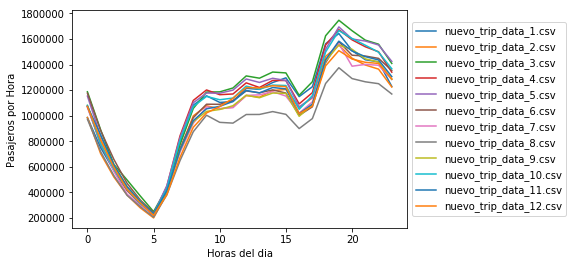

In [20]:
for archivo in plantilla:
  dd=da.read_csv(archivo, usecols= ["dropoff_datetime", "passenger_count"])
  dd['dropoff_datetime']=da.to_datetime(dd['dropoff_datetime'])
  dd['hour'] = dd['dropoff_datetime'].dt.hour
  #dd['weekday'] = dd['dropoff_datetime'].dt.weekday
  estePorHora=dd.groupby('hour')
  #estePorDia=dd.groupby('weekday')
  rt=estePorHora['passenger_count'].sum()
  d=rt.compute()
  plt.plot(d, label=archivo)
  dd=''
  rt=''
  estePorHora=''
plt.xlabel('Horas del dia')
plt.ylabel('Pasajeros por Hora')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

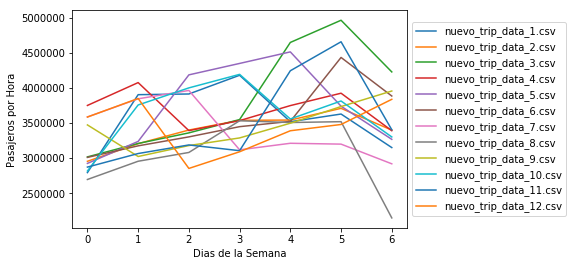

In [21]:
for archivo in plantilla:
  dd=da.read_csv(archivo, usecols= ["dropoff_datetime", "passenger_count"])
  dd['dropoff_datetime']=da.to_datetime(dd['dropoff_datetime'])
  #dd['hour'] = dd['dropoff_datetime'].dt.hour
  dd['weekday'] = dd['dropoff_datetime'].dt.weekday
  #estePorHora=dd.groupby('hour')
  estePorDia=dd.groupby('weekday')
  rt=estePorDia['passenger_count'].sum()
  d=rt.compute()
  plt.plot(d, label=archivo)
  dd=''
  rt=''
  estePorDia=''
plt.xlabel('Dias de la Semana')
plt.ylabel('Pasajeros por Hora')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

In [0]:
dd=da.read_csv('nuevo_trip_data_*.csv', usecols= ["dropoff_datetime", "passenger_count"])

In [0]:
dd['dropoff_datetime']=da.to_datetime(dd['dropoff_datetime'])
dd['dayyear'] = dd['dropoff_datetime'].dt.dayofyear

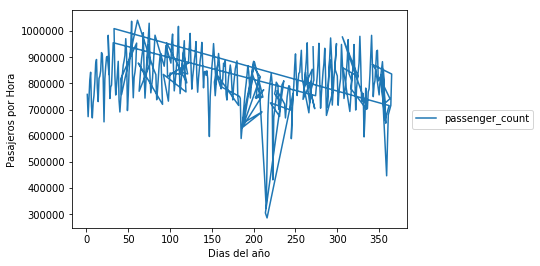

In [109]:
estePorDiaAño=dd.groupby('dayyear')
rt=estePorDiaAño['passenger_count'].sum().compute()
plt.plot(rt)
plt.xlabel('Dias del año')
plt.ylabel('Pasajeros por Hora')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

In [0]:
dd=da.read_csv('nuevo_trip_data_1.csv' ,usecols=['dropoff_datetime','passenger_count'])

In [0]:
dtj=dd

In [0]:
#estos['dropoff_datetime'] = pd.to_datetime(estos['dropoff_datetime'])
dd['dropoff_datetime']=da.to_datetime(dd['dropoff_datetime'])
dd['hour'] = dd['dropoff_datetime'].dt.hour
dd['weekday'] = dd['dropoff_datetime'].dt.weekday

In [0]:
estePorHora=dd.groupby('hour')
estePorDia=dd.groupby('weekday')

In [0]:
estePorHora['passenger_count'].sum().compute().plot.line()
#estePorDia['passenger_count'].sum().compute().plot.line()

In [0]:
este='7E1346F23960CC18D7D129FA28B63A75'

In [0]:
taxi=nuevo[nuevo.medallion==tm]

In [0]:
graf=nuevo

In [0]:
type(graf)

pandas.core.frame.DataFrame

In [0]:
graf['hour'] = graf['dropoff_datetime'].dt.hour
graf['weekday'] = graf['dropoff_datetime'].dt.weekday

In [0]:
grafPorHora=graf.groupby('hour')
grafPorDia=graf.groupby('weekday')

In [0]:
nuevo.plot.line(x='dropoff_datetime', y='passenger_count', figsize=(13,5))
nuevo.plot.line(x='pickup_datetime', y='passenger_count', figsize=(13,5))

In [0]:
grafPorHora['passenger_count'].sum().plot.line()
#grafPorDia['passenger_count'].sum().plot.line()

In [0]:
taxi.sample(frac=.50)

In [0]:
taxi['hour'] = taxi['dropoff_datetime'].dt.hour
taxi['weekday'] = taxi['dropoff_datetime'].dt.weekday

In [0]:
taxiPorHora = taxi.groupby('hour')

In [0]:
taxiPorHora['passenger_count'].sum().plot.line()

#Punto 10
Elegir el vehiculo con mas viajes en cada mes y graficar en un mapa los sitios donde se suben pasajeros agrupados por
dia de la semana (un color distinto para cada dia)
hora del dia (un color distinto para cada intervalo de cuatro horas,00:00 - 03:59, 04:00--07:59, 08:00-11:59, etc.)

Repetir para las posiciones donde se bajan los pasajeros para el mismo vehiculo.

In [0]:
from bokeh.models import BoxZoomTool, ColumnDataSource
from bokeh.plotting import figure, output_notebook, show

In [0]:
archivos = 'nuevo_trip_data_{:d}.csv'
plantilla = [archivos.format(i) for i in range(1, 13)]

In [0]:
NYC = x_range, y_range = ((-8242000,-8210000), (4965000,4990000))

plot_width  = int(750)
plot_height = int(plot_width//1.2)

def base_plot(tools='pan,wheel_zoom,reset',plot_width=plot_width, plot_height=plot_height, **plot_args):
    p = figure(tools=tools, plot_width=plot_width, plot_height=plot_height,
        x_range=x_range, y_range=y_range, outline_line_color=None,
        min_border=0, min_border_left=0, min_border_right=0,
        min_border_top=0, min_border_bottom=0, **plot_args)

    p.axis.visible = False
    p.xgrid.grid_line_color = None
    p.ygrid.grid_line_color = None

    p.add_tools(BoxZoomTool(match_aspect=True))

    return p

options = dict(line_color=None, fill_color='blue', size=5)

In [0]:
listasCafres=[
"7E1346F23960CC18D7D129FA28B63A75",
"0C9C589C0AD57ECCB633CB90A33DC37A",
"19E063791B0DF5A558B8488180DDAB67",
"19E063791B0DF5A558B8488180DDAB67",
"20BA941F62CC07F1FA3EF3E122B1E9B2",
"A4FC84D2662D988828DBD26B0948A413",
"20BA941F62CC07F1FA3EF3E122B1E9B2",
"20BA941F62CC07F1FA3EF3E122B1E9B2",
"20BA941F62CC07F1FA3EF3E122B1E9B2",
"20BA941F62CC07F1FA3EF3E122B1E9B2",
"20BA941F62CC07F1FA3EF3E122B1E9B2",
"F3E844649503D2A5A44DD729348E7336"]

In [0]:
dd=da.read_csv('nuevo_trip_data_1.csv', usecols= ['medallion', 'pickup_datetime','pickup_longitude', 'pickup_latitude'])
dd=dd[dd.medallion==listasCafres[0]]

In [0]:
dd[]

In [0]:

project_projection = pyproj.Proj("+init=EPSG:4326")  # wgs84
google_projection = pyproj.Proj("+init=EPSG:3857")  # default google projection
dd.compute()
longitude = dd['pickup_longitude']
latitude = dd['pickup_latitude']

x, y = pyproj.transform(google_projection, project_projection, longitude, latitude)

In [0]:
import math
import numpy as np
RADIUS = 6378137.0
def lat2y(a):
  return math.log(math.tan(math.pi / 4 + math.radians(a) / 2)) * RADIUS

def lon2x(a):
  return math.radians(a) * RADIUS

In [85]:
#dd=da.read_csv('nuevo_trip_data_1.csv', usecols= ['pickup_longitude', 'pickup_latitude'])
#rt=dd.index[0]
#-73.979340	40.776653
import numpy as np
xl=lon2x(-73.979340)
yl=lat2y(40.776653)
type(xl)

float

In [56]:
from bokeh.tile_providers import STAMEN_TERRAIN
output_notebook()


p= base_plot()
p.add_tile(STAMEN_TERRAIN)
p.circle(x=xl, y=yl, **options)
show(p)

Loading BokehJS ...

In [42]:
dd=da.read_csv('nuevo_trip_data_1.csv', usecols= ['pickup_longitude', 'pickup_latitude'])
dd.dtypes

pickup_longitude    float64
pickup_latitude     float64
dtype: object

In [93]:
!pip install pyproj
from pyproj import Proj, transform
import pyproj

In [0]:
project_projection = pyproj.Proj("+init=EPSG:4326")  # wgs84
google_projection = pyproj.Proj("+init=EPSG:3857")  # default google projection
dd=da.read_csv('nuevo_trip_data_1.csv', usecols= ['pickup_longitude', 'pickup_latitude'])
d=dd['pickup_longitude']
c=dd['pickup_latitude']
d.compute()
c.compute()
puo,pua = pyproj.transform(google_projection, project_projection, d, c)

In [120]:
import math
import numpy as np
RADIUS = 6378137.0
from bokeh.tile_providers import STAMEN_TERRAIN
output_notebook()
dd=da.read_csv('nuevo_trip_data_1.csv', usecols= ['medallion', 'pickup_datetime','pickup_longitude', 'pickup_latitude'])
#dd['viajesLargos']=dd.viajesLargos.map(lambda viajesLargos: 'y' if viajesLargos>1200 else 'n')
#dd['pickup_longitude']=dd.pickup_longitude.map(lambda x: math.radians(np.float64(x)) * RADIUS)
#dd['pickup_latitude']=dd.pickup_latitude.map(lambda y: math.radians(np.float64(y)) * RADIUS)
muestras = dd.sample(frac=.50)
p= base_plot()
p.add_tile(STAMEN_TERRAIN)
p.circle(x=lon2x(muestras['pickup_longitude']), y=lat2y(muestras['pickup_latitude']), **options)
show(p)

Loading BokehJS ...

TypeError: ignored

In [126]:
!pip install pyproj

In [0]:
import pyproj
from pyproj import Proj, transform
from bokeh.models import BoxZoomTool
from bokeh.plotting import figure, output_notebook, show
from bokeh.tile_providers import STAMEN_TERRAIN
import dask.dataframe as dd

In [0]:
colores = ["red", "green", "blue", "gray", "pink", "orange"]
dias = ["Lunes", "Martes", "Miercoles", "jueves", "viernes","Sabado", "Domingo"]

In [0]:
transformacion = lambda x, y: transform(Proj(init='epsg:4326'), Proj(init='epsg:3857'), x, y)

In [0]:
count = 0